# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

### AUTHOR : ADITI AGARWAL

### ORGANIZATION: THE SPARKS FOUNDATION

### PREDICTION USING SUPERVISED ML

### PROBLEM STATEMENT: Predict the percentage of an student based on the no:of study hour

### Importing all required Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,max_error

### READING DATA FROM CSV FILE AND GATHERING BASIC INFO ABOUT IT

In [129]:
#Reading data from csv file
dataSet = pd.read_csv(r"C:\Users\ADITI AGARWAL\Downloads\student_scores .csv")
#To check top 5 rows
dataSet.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [130]:
dataSet.shape

(25, 2)

In [131]:
dataSet.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [132]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### VISULAISING THE DATA

Text(0, 0.5, 'Marks scored')

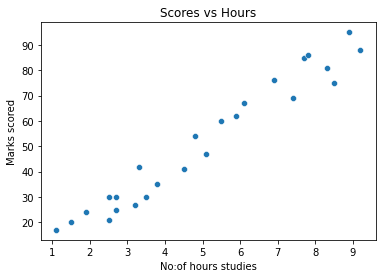

In [133]:
#Scatter Plot
sns.scatterplot(x=dataSet['Hours'],y=dataSet['Scores']);
plt.title('Scores vs Hours')
plt.xlabel('No:of hours studies')
plt.ylabel('Marks scored')

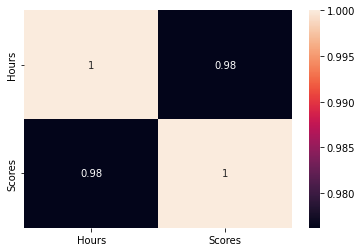

In [134]:
#Checking if there is any correlation btw x(Hours) and y(Scores) values
#This is done using HeatMap
viz=sns.heatmap(dataSet[['Hours','Scores']].corr(),annot=True)

Text(0, 0.5, 'Marks scored')

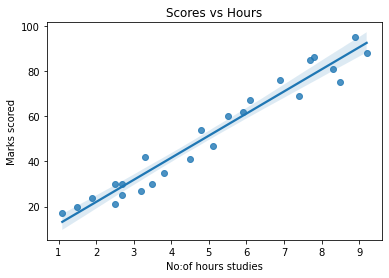

In [135]:
#In above graph , we note a linear positive correlation and hence we try to visualise this scenario better through a regression plot
sns.regplot(x=dataSet['Hours'],y=dataSet['Scores']);
plt.title('Scores vs Hours')
plt.xlabel('No:of hours studies')
plt.ylabel('Marks scored')

### SPLITTING THE DATA INTO TRAINING & TESTING SET

In [136]:
#Seperating our rows and columns first
X = dataSet[['Hours']]
Y = dataSet['Scores']

In [137]:
#Splitting the data set into training and testing data with training data set size and testing data set size being 80% and 20% respectively
x_train,x_test,y_train,y_test= train_test_split(X,Y,train_size=0.80,test_size=.20,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


### TRAINING OUR MODEL

In [138]:
#Initialising the model
Lrm = LinearRegression(fit_intercept=True)
# Training the model
Lrm.fit(x_train,y_train)

LinearRegression()

In [139]:
print(Lrm.coef_,Lrm.intercept_)

[9.83544438] 1.989423110974684


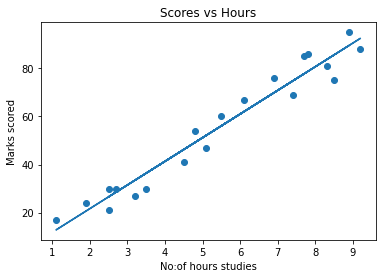

In [140]:
#This is the equation for regression line btw x_train and y_train , following y=mx + c
Line=Lrm.coef_*x_train+Lrm.intercept_
#We plot the scatter plot btw x_train and y_train
plt.scatter(x_train,y_train)
#We plot the regression line in same graph
plt.plot(x_train,Line)
#Showing the final graph after giving required labels and titles
plt.title('Scores vs Hours')
plt.xlabel('No:of hours studies')
plt.ylabel('Marks scored')
plt.show()

### MAKING PREDICTIONS BY RUNNING OUR MODEL ON TESTING DATA

In [141]:
y_pred_test=Lrm.predict(x_test)

In [142]:
#Viewing the Actual Scores and the Scores Predicted by our model side by side
pd.DataFrame({'Actual Scores' : y_test, 'Predicted Scores' : y_pred_test})

,Actual Scores,Predicted Scores
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


<AxesSubplot:xlabel='Scores', ylabel='Density'>

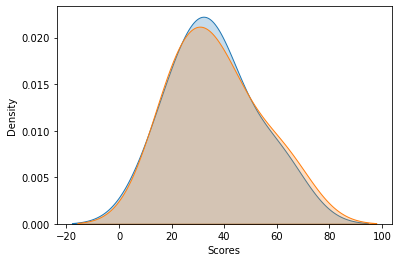

In [143]:
#Plotting the distribution plot for both
sns.kdeplot(y_pred_test,label="PREDICTED",shade=True)
sns.kdeplot(y_test,label="ACTUAL",shade=True)

### MODEL EVALUATION

In [144]:
# We cannot calculate accuracy of a regression model
# So , the performance or evalution of model is reported in terms of the error in in its predictions

In [145]:
# MEAN ABSOLUTE ERROR
print('MEAN ABSOLUTE ERROR: ',mean_absolute_error(y_test,y_pred_test))


MEAN ABSOLUTE ERROR:  4.140342096254413


In [146]:
# MEAN SQUARED ERROR
print('MEAN SQUARED ERROR: ',mean_squared_error(y_test,y_pred_test,squared=False))

MEAN SQUARED ERROR:  4.543287018366107


In [147]:
# MAX ERROR
print('MAX ERROR: ',max_error(y_test,y_pred_test))

MAX ERROR:  7.553610425790623


### QUESTION : WHAT WILL BE THE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HRS/DAY?
### PREDICTING SOLUTION USING OUR MODEL

In [148]:
hour=[9.25]
soln_pred = Lrm.predict([hour])
print('The predicted score of a student who studies 9.25 hrs/day is {}'.format(soln_pred[0]))

The predicted score of a student who studies 9.25 hrs/day is 92.96728365185982


C:\Users\ADITI AGARWAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### We have succesfully predicted the score of a student based on the no:of study hours using a simple Linear Regression Model.